In [ ]:
# https://www.openml.org/search?type=data&id=44096&sort=runs&status=active

In [126]:
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['figure.figsize'] = [10, 5]

In [127]:
arff_file = arff.loadarff('./dataset_31_credit-g.arff')
df = pd.DataFrame(arff_file[0])

df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [129]:
for col in df.select_dtypes(include="object").columns:
    print("{:<20} {}".format(col, ", ".join(map(lambda b: b.decode("utf-8"), list(df[col].unique())))))

checking_status      <0, 0<=X<200, no checking, >=200
credit_history       critical/other existing credit, existing paid, delayed previously, no credits/all paid, all paid
purpose              radio/tv, education, furniture/equipment, new car, used car, business, domestic appliance, repairs, other, retraining
savings_status       no known savings, <100, 500<=X<1000, >=1000, 100<=X<500
employment           >=7, 1<=X<4, 4<=X<7, unemployed, <1
personal_status      male single, female div/dep/mar, male div/sep, male mar/wid
other_parties        none, guarantor, co applicant
property_magnitude   real estate, life insurance, no known property, car
other_payment_plans  none, bank, stores
housing              own, for free, rent
job                  skilled, unskilled resident, high qualif/self emp/mgmt, unemp/unskilled non res
own_telephone        yes, none
foreign_worker       yes, no
class                good, bad


In [130]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


<Axes: >

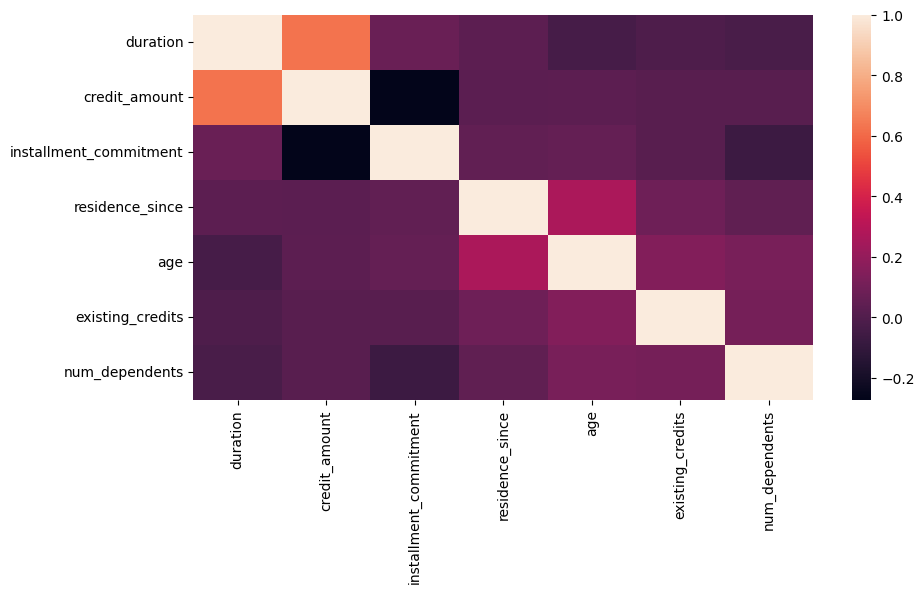

In [131]:
sns.heatmap(df.corr(numeric_only=True))

In [132]:
# Credit amount and duration are highly correlated with coef of ~0.8. That makes sense as the size of the loan grows,
# the duration typically grows as well.

# Let's combine these into a single "monthly payment amount" feature
df['monthly_payment_amount'] = df['credit_amount'] / df['duration']

# I don't want to just remove `duration` because I have a suspicion that shorter term loans (i.e. layaway or payday loans)
# should be treated differently than long term loans (such as for a car).

# https://corporatefinanceinstitute.com/resources/accounting/short-term-loan/ seems to indicate that anything under
# 18 months is considered a short term loan and anything over is long term. Let's create a "is_short_term" feature

df['is_short_term'] = pd.cut(df['duration'], bins=[0, 18, 999], labels=['yes', 'no'])

df.drop(['credit_amount', 'duration'], axis=1, inplace=True)

In [133]:
# Make sure we didn't add any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   object  
 1   credit_history          1000 non-null   object  
 2   purpose                 1000 non-null   object  
 3   savings_status          1000 non-null   object  
 4   employment              1000 non-null   object  
 5   installment_commitment  1000 non-null   float64 
 6   personal_status         1000 non-null   object  
 7   other_parties           1000 non-null   object  
 8   residence_since         1000 non-null   float64 
 9   property_magnitude      1000 non-null   object  
 10  age                     1000 non-null   float64 
 11  other_payment_plans     1000 non-null   object  
 12  housing                 1000 non-null   object  
 13  existing_credits        1000 non-null   float64 
 14  job                     1

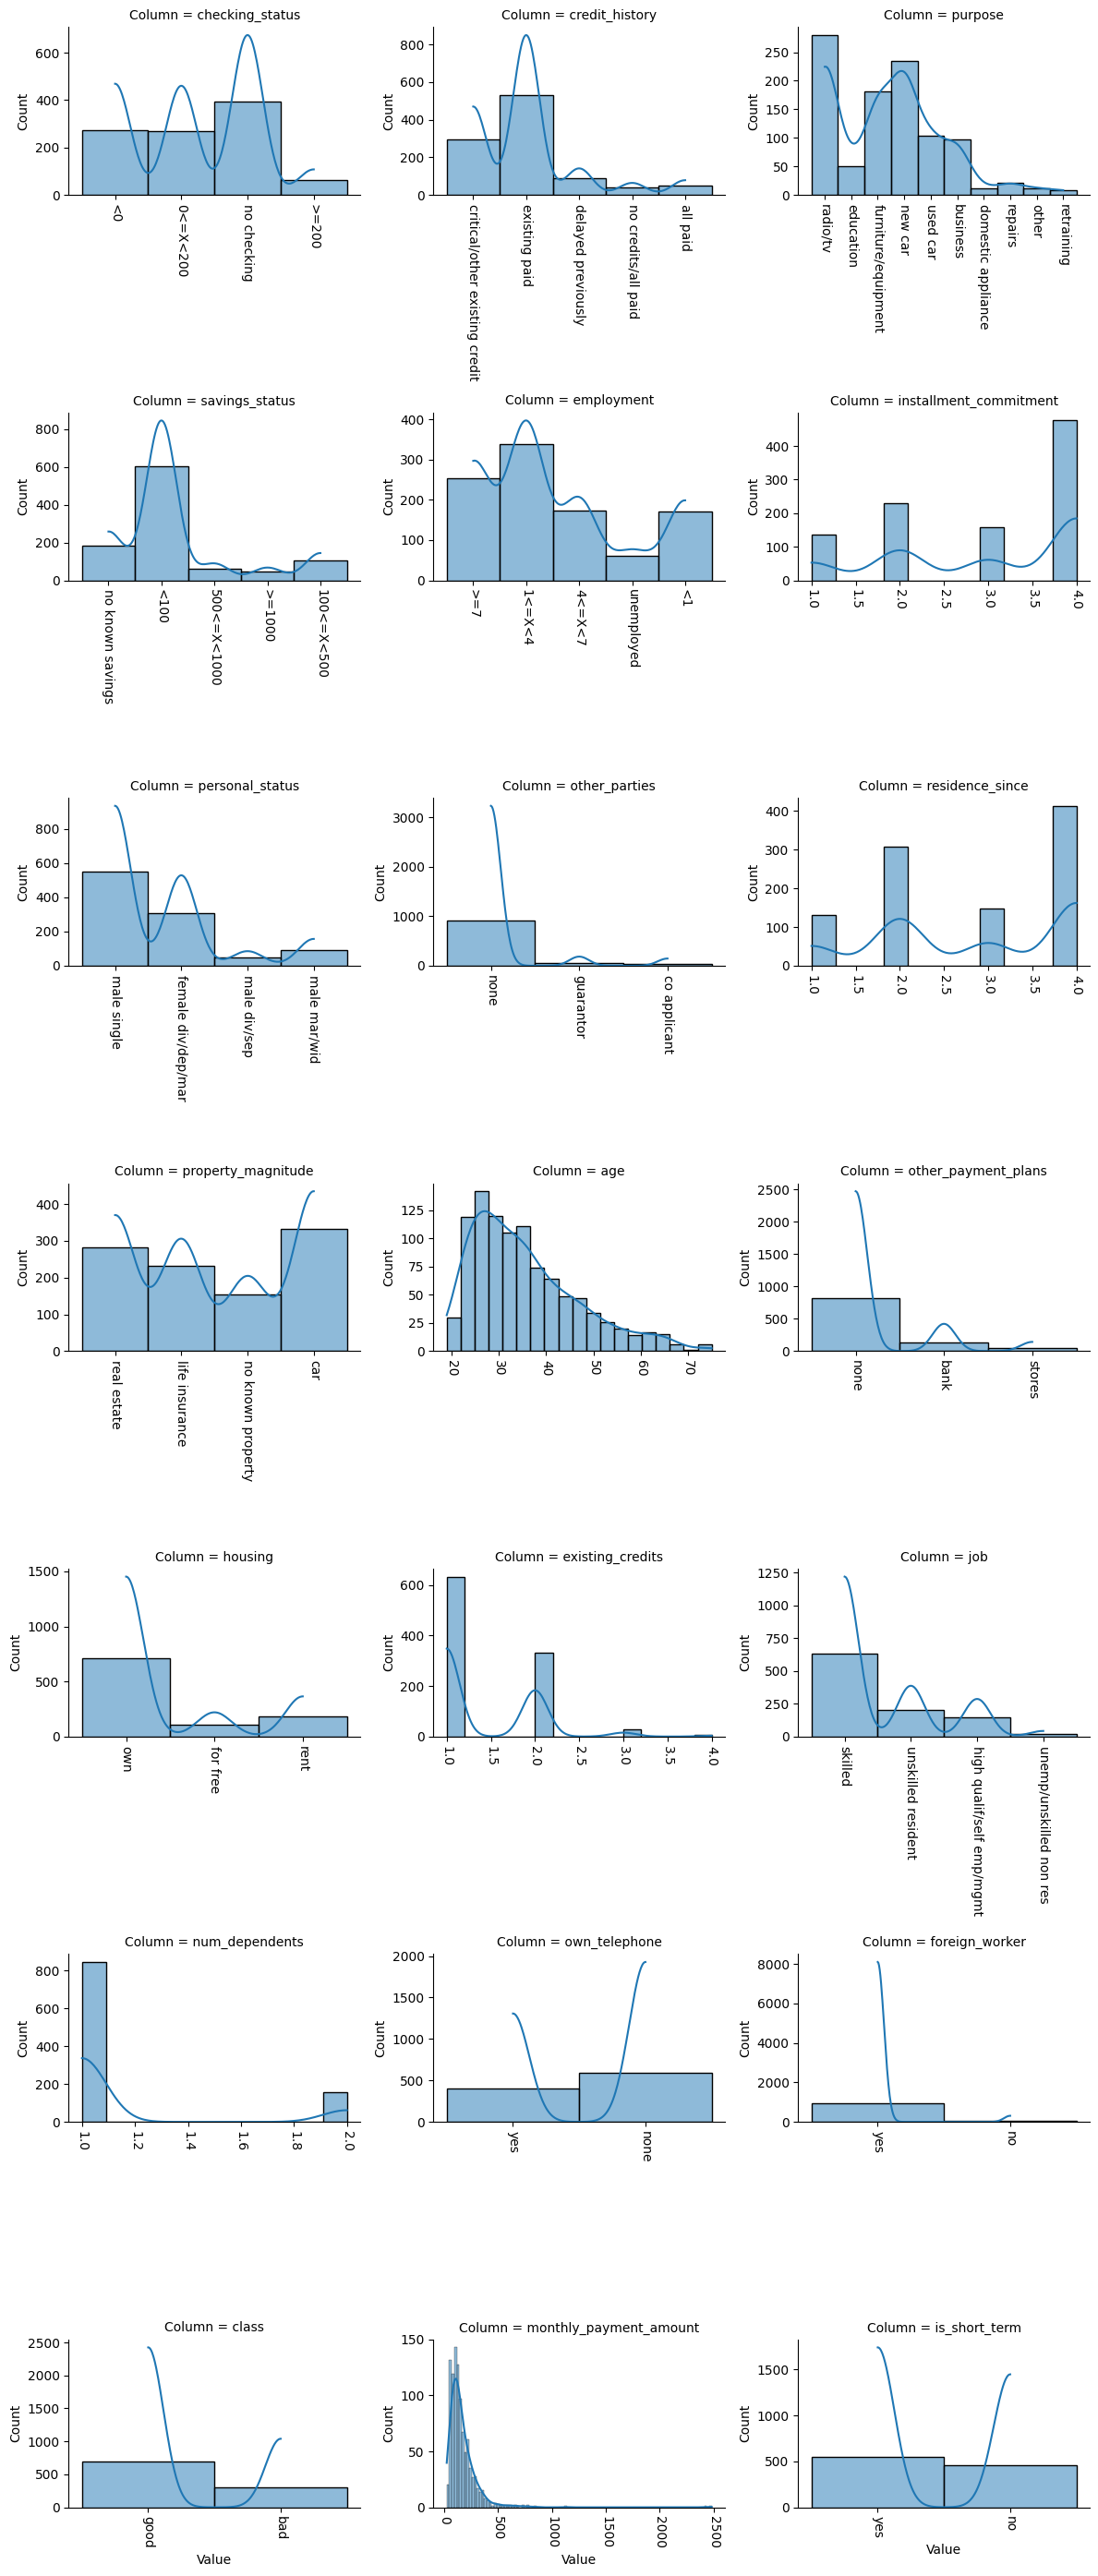

In [134]:
data_melted = df[df.columns].melt(var_name='Column', value_name='Value')
g = sns.FacetGrid(data_melted, col='Column', col_wrap=3, sharex=False, sharey=False, height=4)

g.tick_params(axis='x', rotation=-90)
g.map(sns.histplot, 'Value', kde=True)

plt.show()

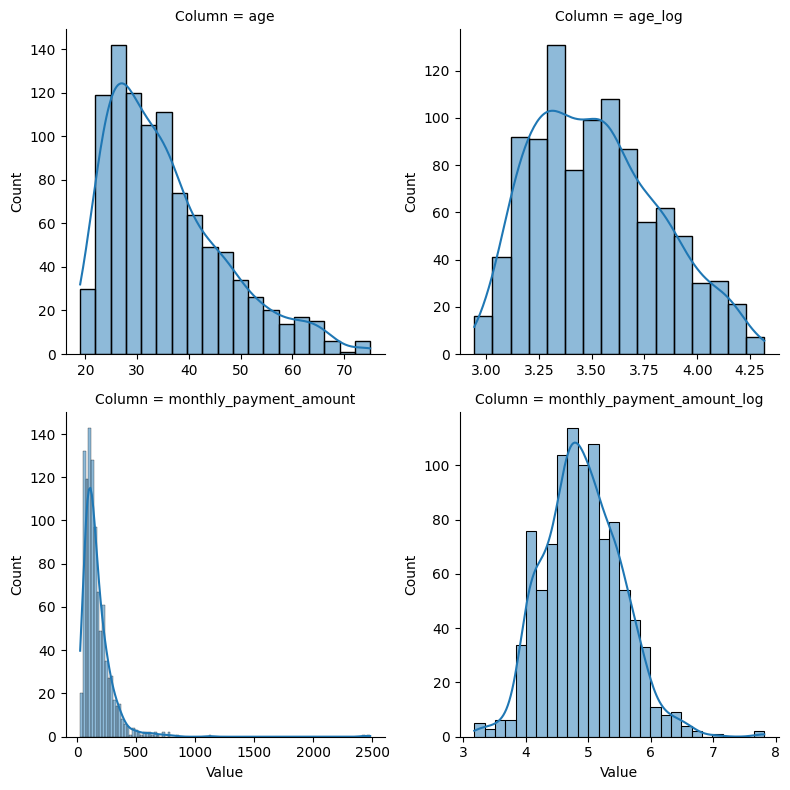

In [142]:
# A couple of numeric features look skewed and could benefit from normalization.

df['age_log'] = np.log(df['age'])
df['monthly_payment_amount_log'] = np.log(df['monthly_payment_amount'])


data_melted = df[['age', 'age_log', 'monthly_payment_amount', 'monthly_payment_amount_log' ]].melt(var_name='Column', value_name='Value')
g = sns.FacetGrid(data_melted, col='Column', col_wrap=2, sharex=False, sharey=False, height=4)
g.map(sns.histplot, 'Value', kde=True)

In [100]:
ordinal_columns = [
  "checking_status",
  "savings_status",
  "employment",
]

nominal_columns = [
  "credit_history",
  "purpose",
  "personal_status",
  "other_parties",
  "property_magnitude",
  "other_payment_plans",
  "housing",
  "job",
  "own_telephone",
  "foreign_worker",
  "is_short_term",
]

numeric_columns = [
  "installment_commitment",
  "residence_since",
  "age_log",
  "existing_credits",
  "num_dependents",
  "monthly_credit_amount_log",
]